# Object: Sheet 3 - International Visitors Arrival Analysis by Sex 
## Content of Analysis and Findings
#### 1. overall analysis and plot for Visitors Arrival by Sex(Figure 1)
Findings:  
Before 2020, the data of visitors of both genders is rising with fluctuations.  
From 2020, the amount has a sharp decline due to the disruption of COVID-19.  
From 2022, the amount began to rebond, but do not reach the level before the virus.
#### 2. Monthly year (2008Jan-2024May) differences and plots in the number of male and female tourists(Figure2 & Figure3)
Findings:   
the first time that the Females Visitors are more than Males is in July, 2015.   
Before that, it is always the condition that Singapore attracts more male visitors.   
After that, we could clearly see that Female visitors are increasing with fluctuations until the COVID disrupted tourism.   
We could assume that after the mid 2015, more female visitors like to visit Singapore, maybe for shopping or safety reasons?
#### 3. 2008-2024 Yearly analysis and plots for Visitors Arrival by Sex(Figure4)
Findings:   
From 2008 to 2019, the yearly amount of visitors of both genders is increasing steadily except for 2014, when the amount of both genders' visitors has decreased.   
From 2019 to 2021, the the yearly amount of visitors of both genders has a sharp decline due to the covid-19.  
After 2021, the amount is recovering and booming rapidly. We can expect that the level of tourism can recover to 2019's level and even better in the following 2024.  
Year 2019 has the maximum amount of visitors, with male of 77,9620, females 81,3380.  
Year 2021 has the minimum amount of visitors, with male of 1,5979, females 1,1523. 
#### 4. 2008-2020 Yearly analysis and plots for the Growth Rates of Visitors Arrival by Sex(Figure5)
Findings:  
Before 2020, the growth rate of Visitors of both genders is fluctuating between -5% to 20%, but the famale growth rate is always higher than male growth rate.
#### 5. 2008Q1-2024Q2 Periodically analysis and plot(Q1, Q2, Q3, Q4) for Visitors Arrival by sex(Figure6 & Figure7)
Findings:  
From 2008 to 2019, the yearly Q2 data is relatively higher than other 3 quarters, rising with fluctuations, for both female and male visitors.  
But from 2020 to now, the increment growth of Q1 is the highest, for both male and female visitors.
#### 6. Groupby 4 quarters analysis and comparison(Figure8)
Findings:  
By Groupby 4 quarters' data of visitors arrival, it has shown that overall, Q3 is the most attractive quarter to both male and female.
#### 7. 2008Q1-2019Q4 Periodically analysis and plot(Q1, Q2, Q3, Q4) for the Growth Rates of Visitors Arrival by sex(Figure9)
Findings:  
Both male and female growth rates show significant fluctuations over the years between -15% to 20%. There are periods of both positive and negative growth rates for both genders.  
In 2015 Q3, the growth rates for females reached peak value (around 16.23%).The lowest growth rates (around -10.17%) for males are seen in 2009 Q1.  
Despite the fluctuations, there is no clear long-term trend favoring one gender over the other in terms of consistent growth rates. Both genders seem to experience high and low growth periods interchangeably.
#### 8. January to December monthly analysis and plots for Visitors Arrival by Sex(Figure10)
Findings:   
Overall, July and August during the summertime, and December to January during the winter are the most attractive to visitors.  
March to June, and September to November have relatively low amounts of visitors, which could be assumes as low seasons for tourism.   
July has the maximum amount of visitors, with males of 57,4778, females of 57,7751.  
September has the minimum amount of visitors, with males of 49,9759, females of 44,5121


## Step1:  Data Preparation

In [5]:
# preparation for deading the sheet 3 as a dataframe
import pandas as pd
import matplotlib.pyplot as plt
oridf = pd.read_excel("travel_inbound.xlsx", sheet_name = "T3", skiprows = range(10))
df1 = oridf.iloc[1:3]
df1 = df1.transpose()
colname = df1.iloc[0]
df1.columns = colname
df2 = df1.copy()
df = df2.iloc[1:]
df = df.astype(float)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Time'}, inplace=True)
df

Data Series,Time,Males,Females
0,2024 May,631609.0,651242.0
1,2024 Apr,656459.0,699106.0
2,2024 Mar,687538.0,792903.0
3,2024 Feb,692084.0,744384.0
4,2024 Jan,685467.0,750859.0
...,...,...,...
192,2008 May,449229.0,339988.0
193,2008 Apr,445014.0,337205.0
194,2008 Mar,473780.0,375731.0
195,2008 Feb,427013.0,335176.0


In [7]:
# deal with the Time
df["Time"] = pd.to_datetime(df["Time"], format='%Y %b')
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df["Period"] = df["Time"].dt.to_period("Q")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df

Data Series,Time,Males,Females,Year,Month,Period
0,2024-05-01,631609.0,651242.0,2024,5,2024Q2
1,2024-04-01,656459.0,699106.0,2024,4,2024Q2
2,2024-03-01,687538.0,792903.0,2024,3,2024Q1
3,2024-02-01,692084.0,744384.0,2024,2,2024Q1
4,2024-01-01,685467.0,750859.0,2024,1,2024Q1
...,...,...,...,...,...,...
192,2008-05-01,449229.0,339988.0,2008,5,2008Q2
193,2008-04-01,445014.0,337205.0,2008,4,2008Q2
194,2008-03-01,473780.0,375731.0,2008,3,2008Q1
195,2008-02-01,427013.0,335176.0,2008,2,2008Q1


## Step 2: Data analysis and data visualization

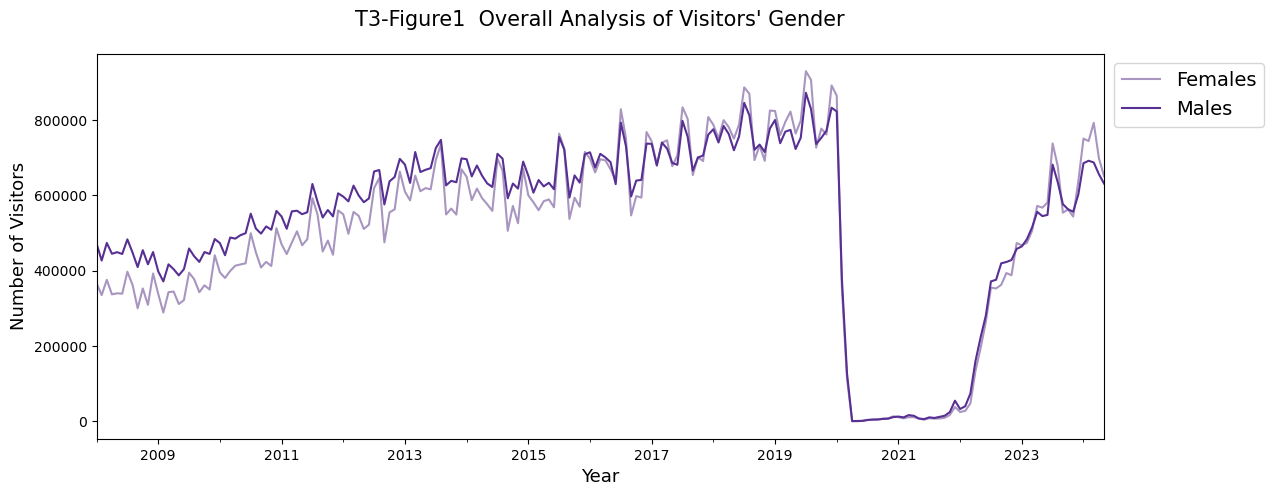

In [9]:
#plot for overall gender data
import matplotlib.dates as mdates
overall = df.plot.line(x = "Time", y=["Females","Males"],figsize = (13,5), color = [ '#a895c0', '#582f93'])
plt.title("T3-Figure1  Overall Analysis of Visitors' Gender", fontsize = 15, pad = 20)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of Visitors", fontsize = 13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})
plt.show()

In [11]:
# When does the amount of Female visitors is more than Males Visitors?
condition = df['Females'] > df['Males']
time_points = df.loc[condition, 'Time']
time_points

0     2024-05-01
1     2024-04-01
2     2024-03-01
3     2024-02-01
4     2024-01-01
5     2023-12-01
9     2023-08-01
10    2023-07-01
11    2023-06-01
12    2023-05-01
13    2023-04-01
16    2023-01-01
17    2022-12-01
41    2020-12-01
42    2020-11-01
43    2020-10-01
52    2020-01-01
53    2019-12-01
55    2019-10-01
57    2019-08-01
58    2019-07-01
59    2019-06-01
60    2019-05-01
61    2019-04-01
62    2019-03-01
63    2019-02-01
64    2019-01-01
65    2018-12-01
69    2018-08-01
70    2018-07-01
71    2018-06-01
72    2018-05-01
73    2018-04-01
74    2018-03-01
75    2018-02-01
76    2018-01-01
77    2017-12-01
79    2017-10-01
81    2017-08-01
82    2017-07-01
83    2017-06-01
85    2017-04-01
87    2017-02-01
88    2017-01-01
89    2016-12-01
93    2016-08-01
94    2016-07-01
95    2016-06-01
101   2015-12-01
105   2015-08-01
106   2015-07-01
Name: Time, dtype: datetime64[ns]

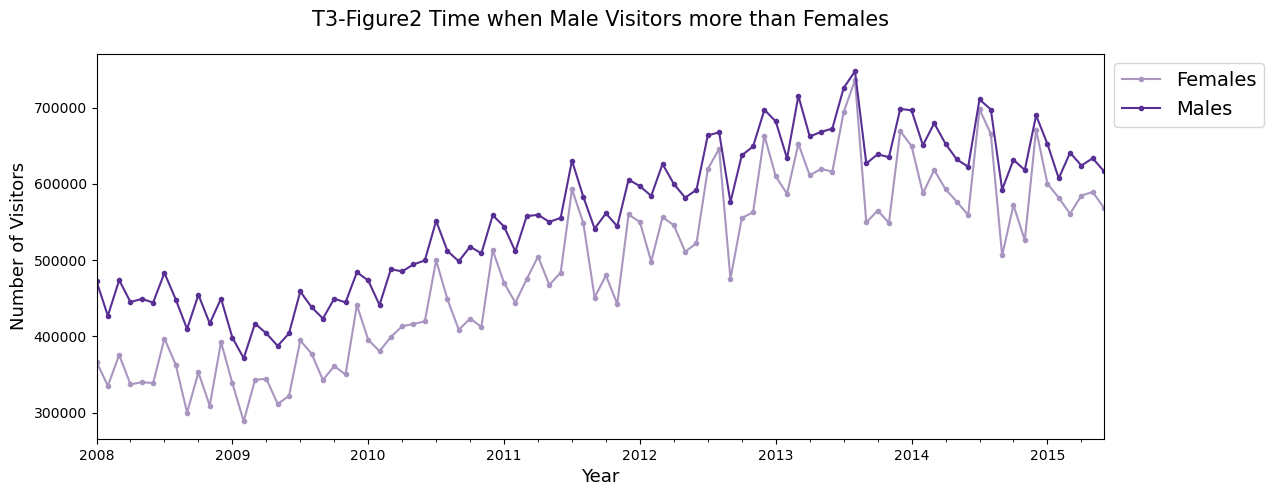

In [13]:
# Plot when Males Visitors are always more than Female Visitors
before = df.iloc[107:]
beforedf = before.plot.line(x = "Time", y=["Females","Males"],figsize = (13,5), marker = "o", markersize = 3, color = [ '#a895c0', '#582f93'])
plt.title("T3-Figure2 Time when Male Visitors more than Females", fontsize = 15, pad = 20)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of Visitors", fontsize = 13) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})
plt.show()

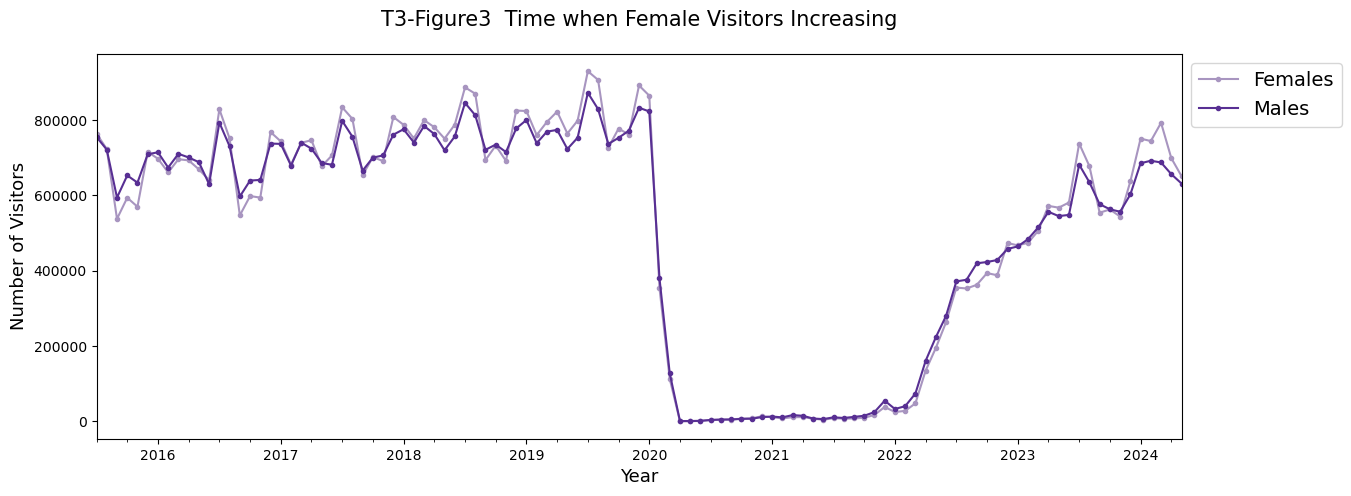

In [15]:
# Plot when Female visitors are more than Male Visitors for the first time and years after
after = df.iloc[:107]
afterdf = after.plot.line(x = "Time", y=["Females","Males"],figsize = (14,5), marker = "o", markersize = 3, color = [ '#a895c0', '#582f93'])
plt.title("T3-Figure3  Time when Female Visitors Increasing", fontsize = 15, pad = 20)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of Visitors", fontsize = 13) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})
plt.show()

In [17]:
#Yeardata for genders
Yeardata = df.groupby("Year")[numeric_cols].mean()
Yeardata

Data Series,Males,Females
Year,,
2008,447860.250000,350736.583333
2009,423428.750000,351309.750000
2010,502423.250000,427583.666667
2011,561992.333333,493335.083333
2012,622614.416667,558747.916667
2013,675401.666667,621510.916667
2014,656073.583333,601854.000000
2015,653479.916667,615808.000000
2016,688133.166667,678821.166667


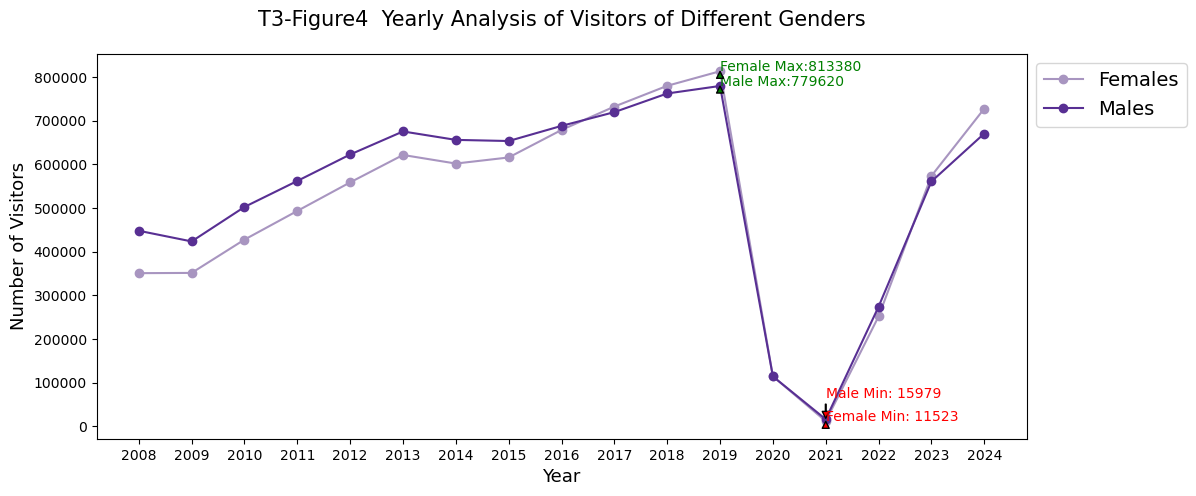

In [19]:
#plot for Yeardata genders
Yeardata.plot.line(y=['Females','Males'],figsize = (12,5), marker = "o", color = [ '#a895c0', '#582f93'])
plt.title("T3-Figure4  Yearly Analysis of Visitors of Different Genders", fontsize = 15, pad = 20)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of Visitors", fontsize = 13)
plt.xticks(Yeardata.index) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})
max_value3 = Yeardata['Males'].max()
min_value3 = Yeardata['Males'].min()
max_year3 = Yeardata['Males'].idxmax()
min_year3 = Yeardata['Males'].idxmin()
plt.annotate(f'Male Max:{int(max_value3)}', xy=(max_year3, max_value3), xytext=(max_year3, max_value3 + 15),
             arrowprops=dict(facecolor='green', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='green')
plt.annotate(f'Male Min: {int(min_value3)}', xy=(min_year3, min_value3), xytext=(min_year3, min_value3 + 50000),
             arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')
max_value4 = Yeardata['Females'].max()
min_value4 = Yeardata['Females'].min()
max_year4 = Yeardata['Females'].idxmax()
min_year4 = Yeardata['Females'].idxmin()
plt.annotate(f'Female Max:{int(max_value4)}', xy=(max_year4, max_value4), xytext=(max_year4, max_value4 + 15),
             arrowprops=dict(facecolor='green', shrink=0.05,width=0.5, headwidth=5, headlength=5), fontsize=10, color='green')
plt.annotate(f'Female Min: {int(min_value4)}', xy=(min_year4, min_value4), xytext=(min_year4, min_value4 + 10),
             arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=5, headlength=5), fontsize=10, color='red')
plt.show()



In [21]:
#Yeardata growth rate
Yeardata['Males Growth Rate (%)'] = Yeardata['Males'].pct_change() * 100
Yeardata['Females Growth Rate (%)'] = Yeardata['Females'].pct_change() * 100
Yeardata

Data Series,Males,Females,Males Growth Rate (%),Females Growth Rate (%)
Year,,,,
2008,447860.250000,350736.583333,NaN,NaN
2009,423428.750000,351309.750000,-5.455162,0.163418
2010,502423.250000,427583.666667,18.655913,21.711301
2011,561992.333333,493335.083333,11.856355,15.377439
2012,622614.416667,558747.916667,10.786995,13.259311
2013,675401.666667,621510.916667,8.478321,11.232794
2014,656073.583333,601854.000000,-2.861717,-3.162763
2015,653479.916667,615808.000000,-0.395332,2.318502
2016,688133.166667,678821.166667,5.302879,10.232600


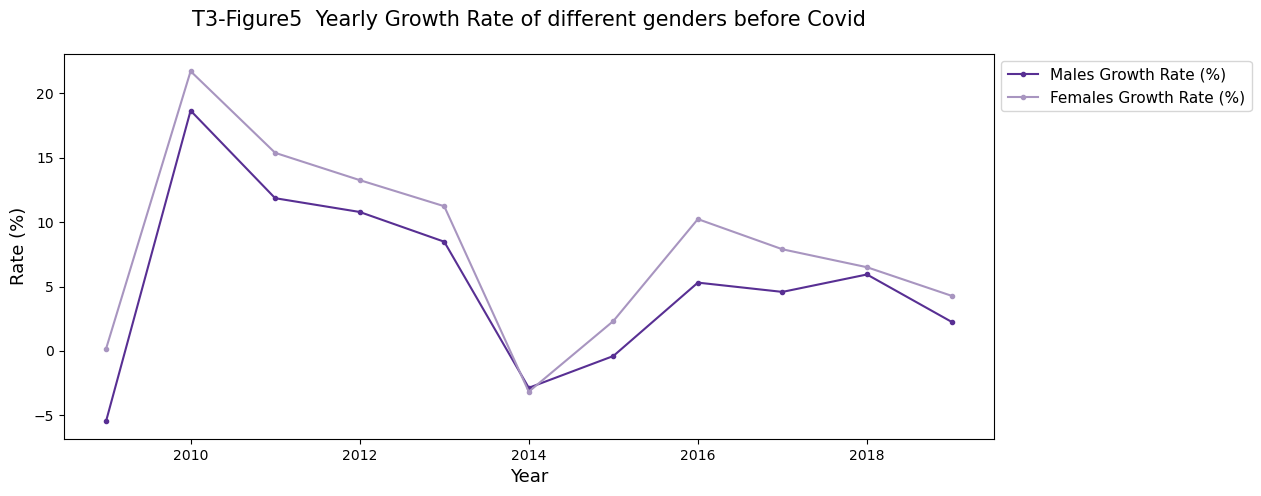

In [23]:
#plot for the yearly growth rate before covid 
beforecovid1 = Yeardata.iloc[:-5]
beforecovid1.plot(y = ['Males Growth Rate (%)', 'Females Growth Rate (%)'],marker = "o", figsize = (12,5), markersize=3,color = ['#582f93','#a895c0'])
plt.title("T3-Figure5  Yearly Growth Rate of different genders before Covid", fontsize = 15, pad = 20)
plt.ylabel("Rate (%)", fontsize = 13)
plt.xlabel("Year", fontsize = 13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 11})
plt.show()



In [25]:
#Periodata
Periodata = df.groupby("Period")[numeric_cols].mean()
Periodata["Year"] = Periodata.index.astype(str).str[:4]
Periodata["Quarter"]=Periodata.index.astype(str).str[4:]
Periodata.reset_index(inplace=True)
Periodata

Data Series,Period,Males,Females,Year,Quarter
0,2008Q1,457696.666667,359251.000000,2008,Q1
1,2008Q2,446213.333333,338698.000000,2008,Q2
2,2008Q3,447148.333333,353433.333333,2008,Q3
3,2008Q4,440382.666667,351564.000000,2008,Q4
4,2009Q1,395602.666667,323497.000000,2009,Q1
...,...,...,...,...,...
61,2023Q2,549915.000000,573554.333333,2023,Q2
62,2023Q3,631120.333333,656567.333333,2023,Q3
63,2023Q4,574131.666667,581242.000000,2023,Q4
64,2024Q1,688363.000000,762715.333333,2024,Q1


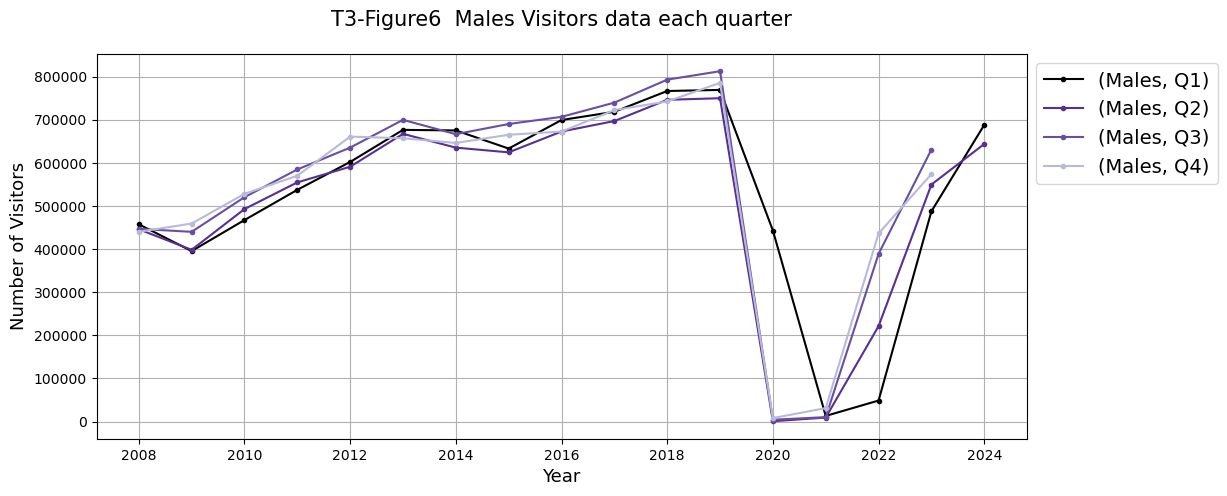

In [27]:
# Quarter data for Males 
Periodpivot1 = Periodata.pivot(index = "Year",columns = "Quarter", values = ["Males"])
P1 = Periodpivot1.plot(marker = "o", figsize = (12,5), markersize=3,color = ['black','#582f93', '#694fa2','#b9b9da'])
P1.grid(True)
P1.legend(title = "Males data each quarter")
plt.title("T3-Figure6  Males Visitors data each quarter", fontsize = 15, pad = 20)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of Visitors", fontsize = 13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})
plt.show()     


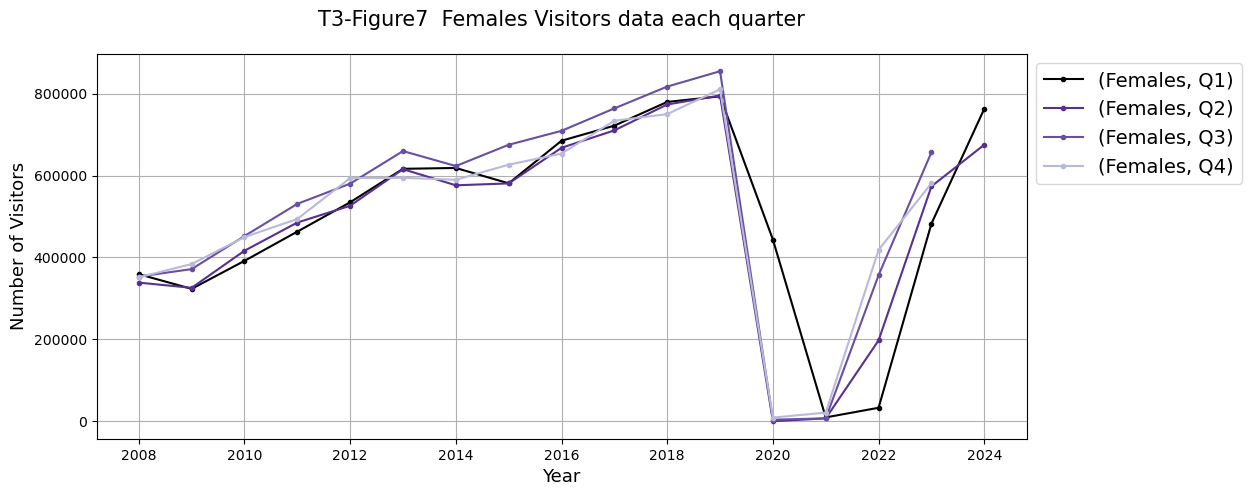

In [29]:
# Quarter data for Females 
Periodpivot2 = Periodata.pivot(index = "Year",columns = "Quarter", values = ["Females"])           
P2 = Periodpivot2.plot(marker = "o", figsize = (12,5), markersize=3,color = ['black','#582f93', '#694fa2','#b9b9da'])
P2.grid(True)
P2.legend(title = " Females data each quarter")
plt.title("T3-Figure7  Females Visitors data each quarter", fontsize = 15, pad = 20)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of Visitors", fontsize = 13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})
plt.show()     

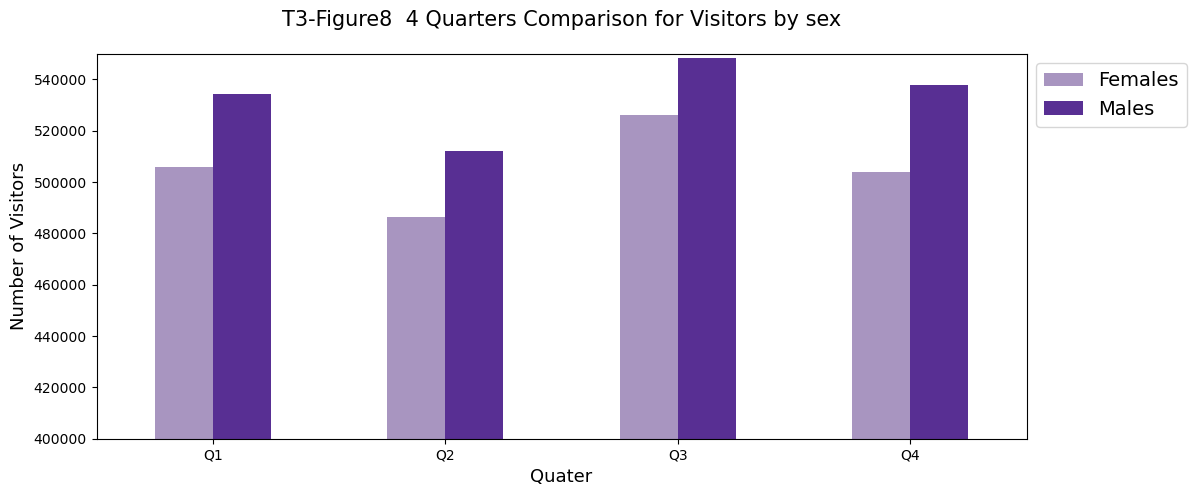

Data Series,Males,Females
Quarter,,
Q1,534279.784314,505868.137255
Q2,512011.098039,486231.647059
Q3,548359.770833,525998.520833
Q4,537689.000000,503859.333333


In [31]:
# 4 Quarters Comparison
p2=Periodata.groupby("Quarter")[numeric_cols].mean()
p2.plot(y=['Females','Males'],color = ['#a895c0', '#582f93'], figsize = (12,5), kind = "bar")
plt.ylim(400000, 550000)
plt.xticks(rotation = 0) 
plt.title("T3-Figure8  4 Quarters Comparison for Visitors by sex", fontsize = 15, pad = 20)
plt.xlabel("Quater", fontsize = 13)
plt.ylabel("Number of Visitors", fontsize = 13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 14})
plt.show()
p2

In [33]:
#Periodata growth rate
# Periodata['Males Growth Rate (%)'] = Periodata['Males'].pct_change() * 100
# Periodata['Females Growth Rate (%)'] = Periodata['Females'].pct_change() * 100
# Periodata
# Periodata.to_csv("Periodata")

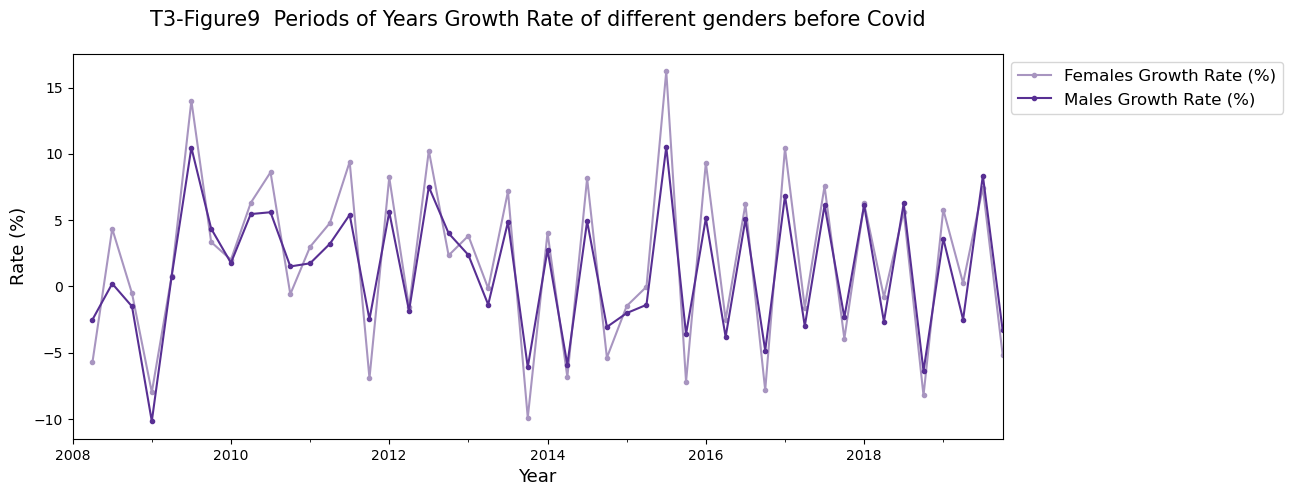

In [36]:
#plot for the periodically growth rate before covid 
beforecovid = Periodata.iloc[:48]
beforecovid.plot(x = "Period", y = ['Females Growth Rate (%)', 'Males Growth Rate (%)'],marker = "o", figsize = (12,5), markersize=3,color = ['#a895c0', '#582f93'])
plt.title("T3-Figure9  Periods of Years Growth Rate of different genders before Covid", fontsize = 15, pad = 20)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Rate (%)", fontsize = 13)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 12})
plt.show()

In [38]:
# Monthdata
Monthdata = df.groupby("Month")[numeric_cols].mean()
Monthdata["portion_male"] = Monthdata["Males"]/Monthdata["Males"].sum()
Monthdata["portion_female"] = Monthdata["Females"]/Monthdata["Females"].sum()
Monthdata.reset_index(inplace=True)
Monthdata

Data Series,Month,Males,Females,portion_male,portion_female
0,1,562416.823529,538358.058824,0.088032,0.088924
1,2,509676.764706,480319.411765,0.079777,0.079337
2,3,530745.764706,498926.941176,0.083075,0.082411
3,4,516624.294118,493809.176471,0.080864,0.081565
4,5,507210.058824,477357.882353,0.079391,0.078848
5,6,503959.250000,475800.000000,0.078882,0.078591
6,7,584778.250000,577751.062500,0.091532,0.095431
7,8,560542.062500,555122.562500,0.087739,0.091693
8,9,499759.000000,445121.937500,0.078224,0.073524
9,10,523676.562500,480378.312500,0.081968,0.079347


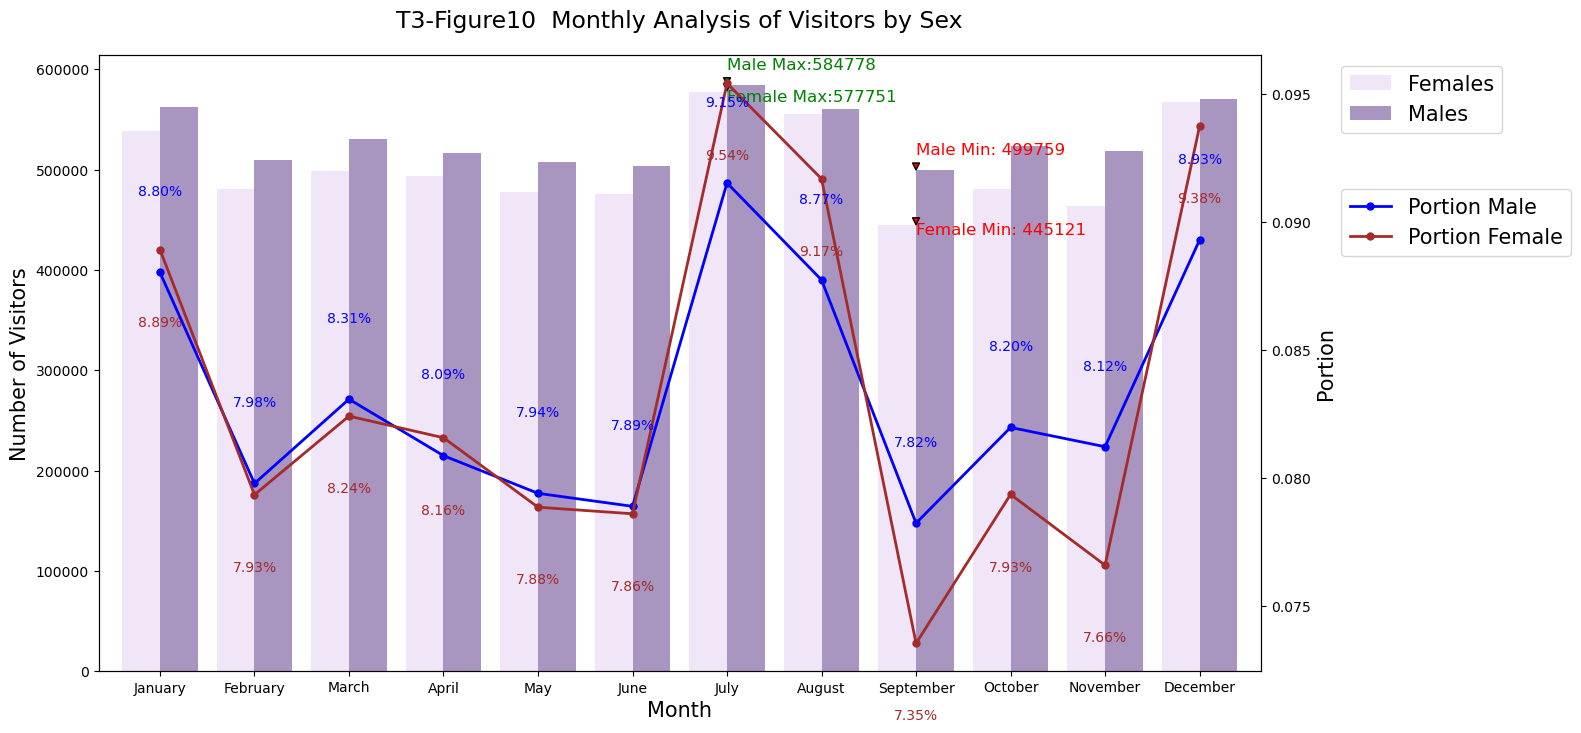

In [40]:
#plot for Monthdata
ax1 = Monthdata.plot(x = "Month", y=["Females","Males"],figsize = (15,8), color = [ '#f0e6f7','#a895c0'], kind = "bar", width = 0.8)
plt.title("T3-Figure10  Monthly Analysis of Visitors by Sex", fontsize = 17, pad = 20)
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax1.set_xticklabels(months)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Number of Visitors", fontsize = 15)
plt.xticks(rotation = 0) 
max_value1 = Monthdata['Males'].max()
min_value1 = Monthdata['Males'].min()
max_month1 = Monthdata['Males'].idxmax()
min_month1 = Monthdata['Males'].idxmin()
plt.annotate(f'Male Max:{int(max_value1)}', xy=(max_month1, max_value1), xytext=(max_month1, max_value1+15000),
             arrowprops=dict(facecolor='green', shrink=0.5,width=0.5, headwidth=5, headlength=5), fontsize=12, color='green')
plt.annotate(f'Male Min: {int(min_value1)}', xy=(min_month1, min_value1), xytext=(min_month1, min_value1+15000),
             arrowprops=dict(facecolor='red', shrink=0.5, width=0.5, headwidth=5, headlength=5), fontsize=12, color='red')
max_value2 = Monthdata['Females'].max()
min_value2 = Monthdata['Females'].min()
max_month2 = Monthdata['Females'].idxmax()
min_month2 = Monthdata['Females'].idxmin()
plt.annotate(f'Female Max:{int(max_value2)}', xy=(max_month2, max_value2), xytext=(max_month2, max_value2-10000),
             arrowprops=dict(facecolor='green', shrink=0.5,width=0.5, headwidth=5, headlength=5), fontsize=12, color='green')
plt.annotate(f'Female Min: {int(min_value2)}', xy=(min_month2, min_value2), xytext=(min_month2, min_value2-10000),
             arrowprops=dict(facecolor='red', shrink=0.5, width=0.5, headwidth=5, headlength=5), fontsize=12, color='red')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax2 = ax1.twinx()
ax2.plot(Monthdata.index, Monthdata["portion_male"], color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Portion Male')
ax2.plot(Monthdata.index, Monthdata["portion_female"], color='brown', marker='o', linestyle='-', linewidth=2, markersize=5, label='Portion Female')
ax2.set_ylabel("Portion", fontsize = 15)

for i in Monthdata.index:
    ax2.annotate(f'{Monthdata["portion_male"][i]:.2%}', xy=(i, Monthdata["portion_male"][i]), xytext=(i, Monthdata["portion_male"][i]+0.003),
                 fontsize=10, color='blue', ha='center')
    ax2.annotate(f'{Monthdata["portion_female"][i]:.2%}', xy=(i, Monthdata["portion_female"][i]), xytext=(i, Monthdata["portion_female"][i]-0.003),
                 fontsize=10, color='brown', ha='center')
ax1.legend(loc='upper left', bbox_to_anchor=(1.06, 1), prop={'size': 15})
ax2.legend(loc='upper left', bbox_to_anchor=(1.06, 0.8), prop={'size': 15})
plt.show()
